In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from utils.data_processing import normalize, to_timeSeries
from utils.metrics import regression_metrics, compare

In [2]:
model = tf.keras.models.load_model('pretrained/test_model.h5')

In [6]:
'''
On crée le jeu de données pour le fit. 
Cette partie est à changer en fonction du modèle
'''

df = pd.read_csv('data/test_data_2017_2019.csv', parse_dates=['Date'], index_col='Date')
df = df.interpolate(method='polynomial', order=2)

normalized_df = normalize(df)

conso_df = normalized_df['Global Consumption']
X, y = to_timeSeries(conso_df.to_numpy())

In [7]:
prediction = model.predict(X)

138/138 [==============================] - 0s 2ms/step


In [8]:
results = regression_metrics(prediction, y, metrics=['mse', 'mae', 'rmse', 'rmsle', 'me'])

In [9]:
for key, values in results.items():
    print(f'model {key} :')
    print(f'{values}\n')

model mse :
3.7076093576615676e-05

model mae :
0.005665327422320843

model rmse :
0.006089014001190662

model rmsle :
2.443861922074575e-05

model me :
0.02740609645843506



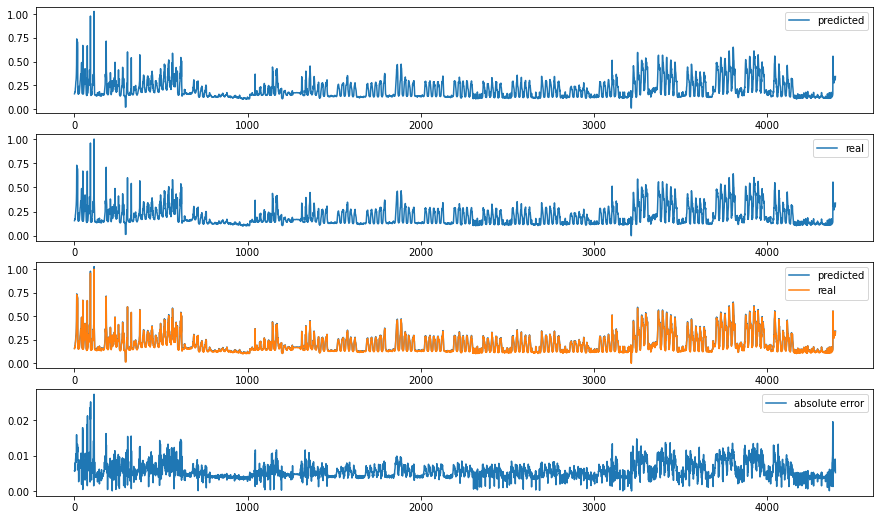

In [10]:
fig = compare(prediction, y)